# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Load the dataset


In [ ]:
df = pd.read_csv('/content/Traffic_Jams.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [ ]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [ ]:
df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high
6323,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [ ]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


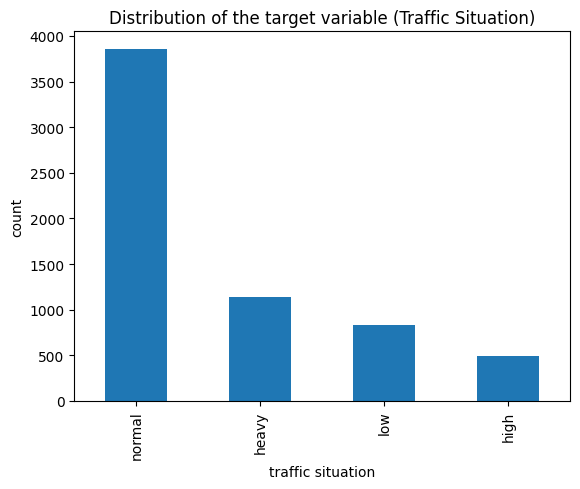

In [ ]:
# Visualize the target variable : Traffic Situation
df['Traffic Situation'].value_counts().plot(kind='bar')

plt.title('Distribution of the target variable (Traffic Situation)')
plt.xlabel('traffic situation')
plt.ylabel('count')
plt.show()

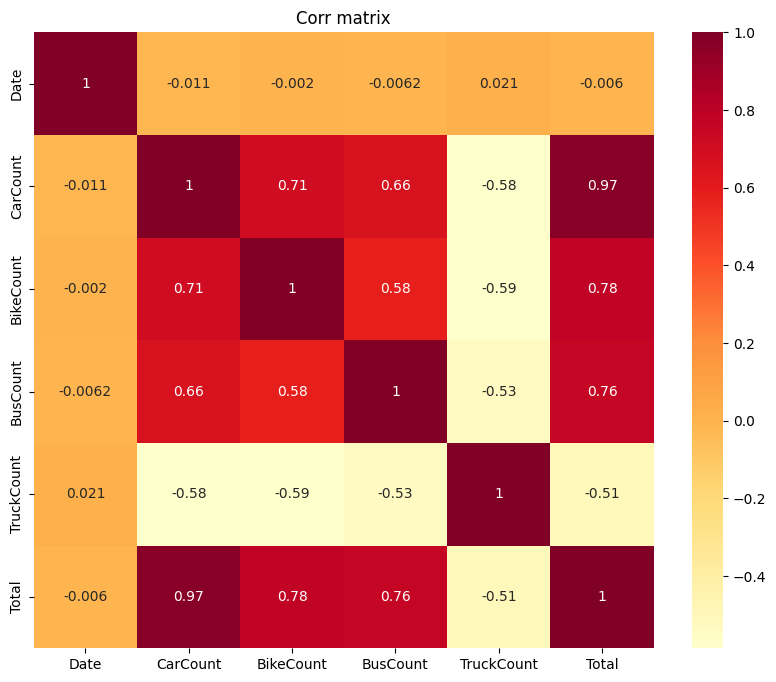

In [ ]:
# Correlation Analysis
# here am select just the numeric feature in the correlation matrix
num_features = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Corr matrix')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [ ]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


* all the data int , excebt : Time & Day of the week, Traffic situation
i will convert it to category , and the Time to datetime


In [ ]:
df['Time'].value_counts()

,count
Time,
9:30:00 PM,77
7:15:00 PM,74
1:30:00 AM,73
9:00:00 PM,72
12:30:00 AM,72
...,...
5:15:00 PM,62
5:30:00 PM,62
5:45:00 PM,62


In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-93-1bfd8981fe14>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format= '%H:%M:%S').dt.hour

In [ ]:
df.dtypes

,0
Time,int32
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [ ]:
df['Day of the week'].value_counts()

,count
Day of the week,
Thursday,1020
Wednesday,1012
Tuesday,1011
Friday,832
Saturday,819
Sunday,816
Monday,814


In [ ]:
df['Day of the week'] = df['Day of the week'].astype('category')

In [ ]:
df.dtypes

,0
Time,int32
Date,int64
Day of the week,category
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [ ]:
df['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,3858
heavy,1137
low,834
high,495


In [ ]:
df['Traffic Situation'] = df['Traffic Situation'].astype('category')

In [ ]:
df.dtypes

,0
Time,int32
Date,int64
Day of the week,category
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,category


In [ ]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,10,Tuesday,13,2,2,24,41,normal
1,0,10,Tuesday,14,1,1,36,52,normal
2,0,10,Tuesday,10,2,2,32,46,normal
3,0,10,Tuesday,10,2,2,36,50,normal
4,1,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
6319,10,9,Thursday,26,16,13,16,71,normal
6320,20,9,Thursday,72,25,10,27,134,high
6321,21,9,Thursday,107,13,14,28,162,high
6322,21,9,Thursday,106,18,13,27,164,high


In [ ]:
df['Traffic Situation'].value_counts()

,count
Traffic Situation,
normal,3858
heavy,1137
low,834
high,495


In [ ]:
# Label encoder for Day of week

encoder = LabelEncoder()
df["Day of the week"] = encoder.fit_transform(df["Day of the week"])
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,10,5,13,2,2,24,41,normal
1,0,10,5,14,1,1,36,52,normal
2,0,10,5,10,2,2,32,46,normal
3,0,10,5,10,2,2,36,50,normal
4,1,10,5,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
6319,10,9,4,26,16,13,16,71,normal
6320,20,9,4,72,25,10,27,134,high
6321,21,9,4,107,13,14,28,162,high
6322,21,9,4,106,18,13,27,164,high


* this the dataframe after encoder on Day of the week column

In [ ]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [ ]:
# Standardize numerical features.
scaler = StandardScaler()
df[['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']] = scaler.fit_transform(df[['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']])
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,-1.638451,-0.674765,0.906058,-1.159175,-0.881214,-0.857050,0.498124,-1.192287,normal
1,-1.638451,-0.674765,0.906058,-1.136604,-0.969218,-0.938226,1.617112,-0.995318,normal
2,-1.638451,-0.674765,0.906058,-1.226890,-0.881214,-0.857050,1.244116,-1.102756,normal
3,-1.638451,-0.674765,0.906058,-1.226890,-0.881214,-0.857050,1.617112,-1.031131,normal
4,-1.495923,-0.674765,0.906058,-1.204319,-0.881214,-0.938226,1.430614,-1.066943,normal
...,...,...,...,...,...,...,...,...,...
6319,-0.213162,-0.786419,0.408368,-0.865746,0.350849,0.035890,-0.247868,-0.655099,normal
6320,1.212127,-0.786419,0.408368,0.172545,1.142889,-0.207639,0.777871,0.472996,high
6321,1.354656,-0.786419,0.408368,0.962549,0.086836,0.117066,0.871120,0.974371,high
6322,1.354656,-0.786419,0.408368,0.939977,0.526858,0.035890,0.777871,1.010184,high


In [ ]:
# All columns are important in DataFrame and, therefore I do not need to remove any of them

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

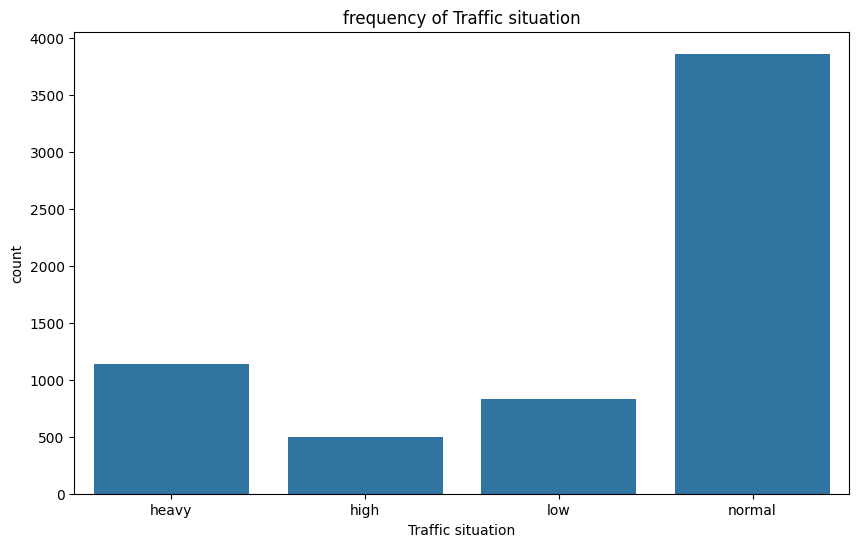

In [ ]:
# Count Plots for Categorical Features

plt.figure(figsize=(10,6))
sns.countplot( x= 'Traffic Situation', data=df)
plt.title('frequency of Traffic situation')
plt.xlabel('Traffic situation')
plt.ylabel('count')

plt.show()

* the normal Traffic situation is the most , Least traffic high

Text(0.5, 1.0, 'Traffic Situation by Total num of cars , .....')

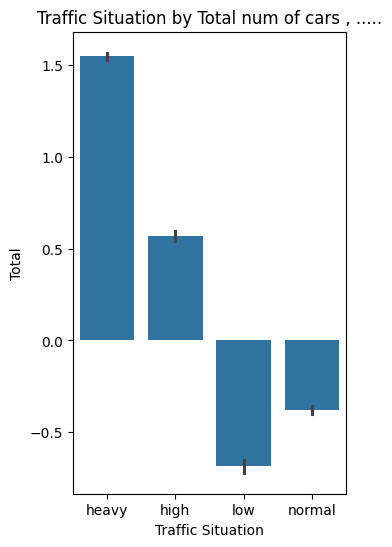

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Traffic Situation', y='Total', data=df)
plt.title('Traffic Situation by Total num of cars , .....')

* The more vehicles, the more complex the traffic condition

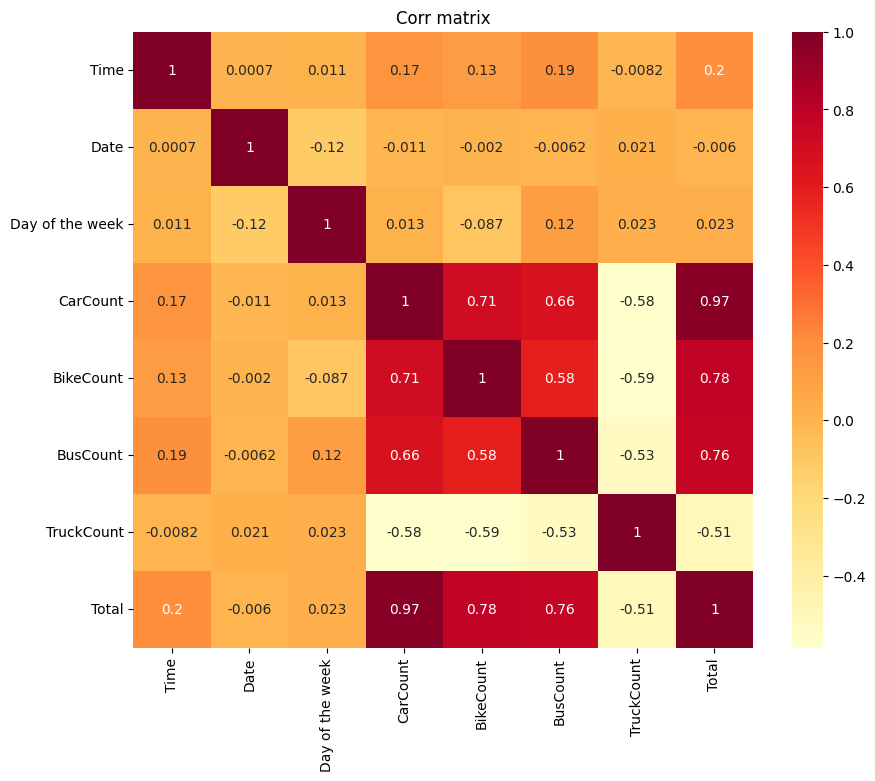

In [ ]:
# Correlation Heatmap

num_features = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Corr matrix')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [ ]:
# the feature
X = df.drop('Traffic Situation', axis=1)
# the target
y = df['Traffic Situation']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [ ]:
bagging_clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, random_state=42)

In [ ]:
bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  random_state=42)

### Evaluate the model performance

In [ ]:
bagging_pred = bagging_clf.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, bagging_pred)
#precision = precision_score(y_test, bagging_pred)
#recall = recall_score(y_test, bagging_pred)
#f1 = f1_score(y_test, bagging_pred)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)
#print("F1-score:", f1)

Accuracy: 0.8592885375494071


* am set the precision, recall, f1_score as comment becase this error shown : ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

 * and I think it is enough  to see the accuracy

## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [ ]:
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
boosting_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluate the model performance

In [ ]:
boosting_pred = boosting_clf.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, boosting_pred)
#precision = precision_score(y_test, boosting_pred)
#recall = recall_score(y_test, boosting_pred)
#f1 = f1_score(y_test, boosting_pred)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)
#print("F1-score:", f1)

Accuracy: 0.9146245059288538


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [ ]:
# the base models
base_models = [
    ('bagging', bagging_clf),
    ('boosting', boosting_clf)
]

### Define meta-learner (LogisticRegression)

In [ ]:
meta_learner = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [ ]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)

In [ ]:
stacking_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

StackingClassifier(cv=5,
                   estimators=[('bagging',
                                BaggingClassifier(base_estimator=LogisticRegression(),
                                                  n_estimators=100,
                                                  random_state=42)),
                               ('boosting',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [ ]:
stacking_pred = stacking_clf.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, stacking_pred)
#precision = precision_score(y_test, stacking_pred)
#recall = recall_score(y_test, stacking_pred)
#f1 = f1_score(y_test, stacking_pred)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)
#print("F1-score:", f1)

Accuracy: 0.9177865612648222


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

**Feature Selection and Engineering **
* the Total number of vehicles, whether cars or other vehicles, because the more vehicles there are, the more complex the traffic situation will be

* Yes, I scale all numeric feature because of that I can visualize and model.


**Model Selection **
* The reason for using this ensemble approach is that each individual model (Bagging and Boosting) has its own strengths and weaknesses. By combining them in a StackingClassifier, I can leverage the advantages of each model, and it also helps reduce the risk of overfitting.

* Stacking classifier has the best accuracy and the Bagging has the lewst accuracy, The reason Stacking classifier is best is that it combines 2 Moodle and learns from the good patterns in both

Model Evaluation
* I used the accuracy metric and it showed me that Bagging was the least accurate of them all and that Boosting was the most accurate. When we combined them together in a Stacking classifier , it gave me a higher accuracy.